# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import scipy.signal as signal

import scipy as sp
import numpy as np

In [88]:
from os.path import dirname, join as pjoin
data_dir = pjoin(dirname(sp.io.__file__))

# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



2^14 =  16384
Отсчётов в секунде:  96000
T0 = 1.2e-3; 1/f = 0.0012674271229404308


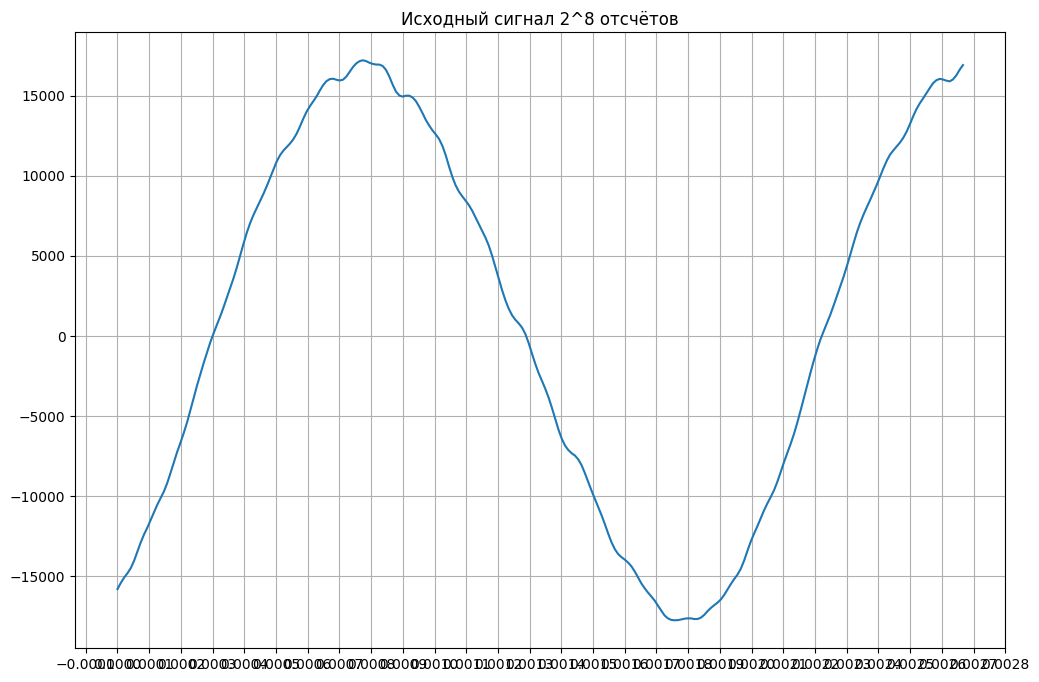

<Figure size 1200x800 with 0 Axes>

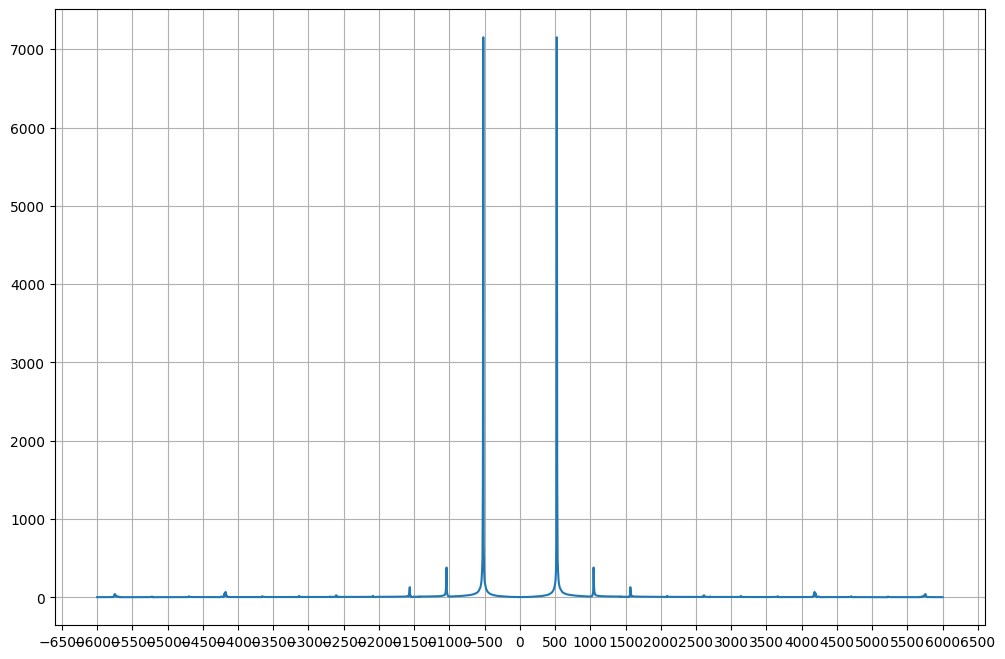

In [89]:
# Загрузка аудиофайла
samplerate, data = sp.io.wavfile.read('./dataset_lab3_/wine-glass.wav')

# Построение исходного сигнала 2^8 отсчётов
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Исходный сигнал 2^8 отсчётов")
time_axis = np.linspace(0, 256, 256) / samplerate
ax.plot(time_axis, data[100000:100000 + 2**8])
ax.grid(True)

# Равномерная сетка по времени (шаг 0.0001 секунды)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.0001))

# Построение спектра
plt.figure(figsize=(12, 8))
if data.shape[0] <= 2**14:
    data = np.append(data, np.zeros(2**14 - data.shape[0]))
else:
    data = data[100000:100000 + 2**14]

print("2^14 = ", data.shape[0])

spectrum = np.abs(sp.fft.fftshift(sp.fft.fft(data)))
spectrum /= spectrum.shape[0]

freq_axis = np.linspace(-0.0625, 0.0625, 2048) * samplerate

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(freq_axis, spectrum[7168:9216])
ax.grid(True)

# Равномерная сетка по частоте (например, шаг 500 Гц)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

print("Отсчётов в секунде: ", samplerate)
print("T0 = 1.2e-3;", "1/f =", 1/789)


## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


A_m = 6.0 	 phi_m = -45.0 градусов
A_m = 4.0 	 phi_m = -120.0 градусов
A_m = 9.0 	 phi_m = -120.0 градусов


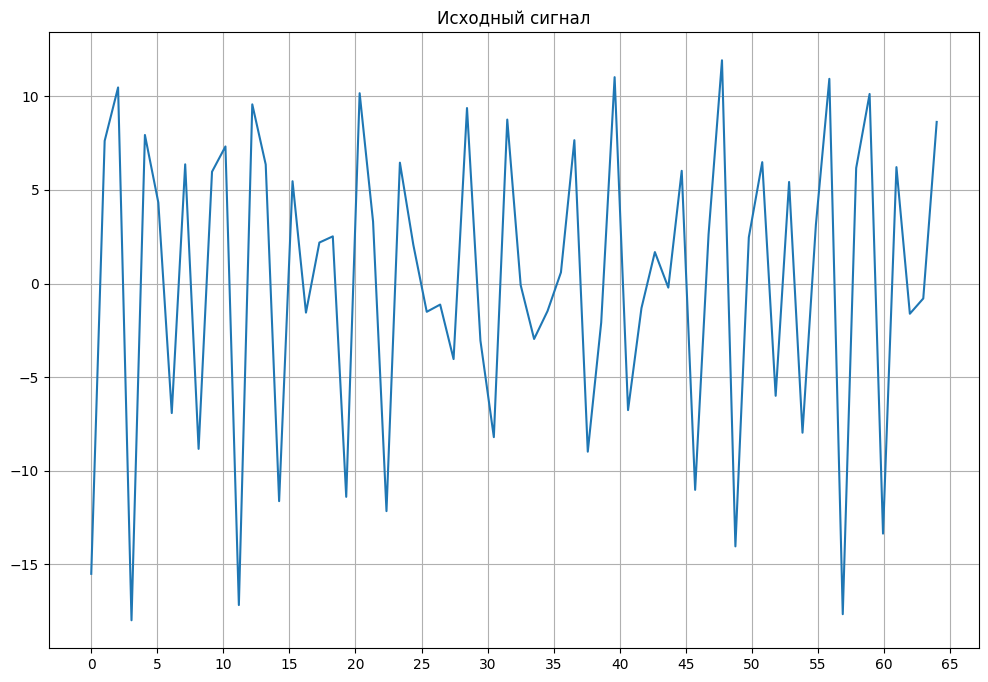

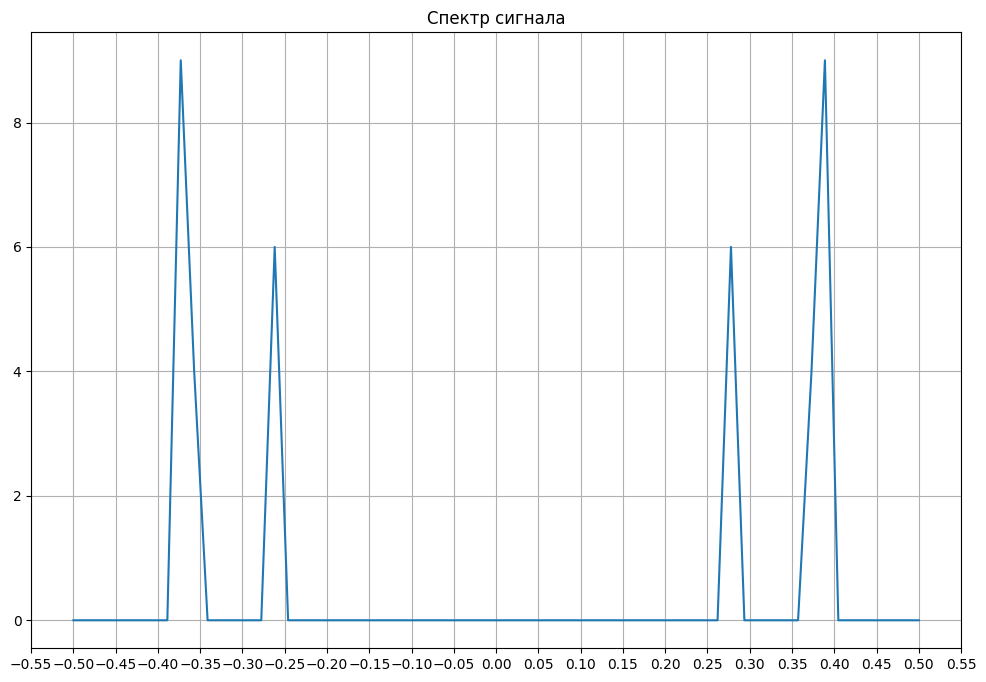

In [151]:
# Загрузка сигнала
Nv = 12
x = np.load('./dataset_lab3_/variant_%i_ex_1_2.npy' % Nv)

# Вычисление спектра
spectrum = sp.fft.fftshift(sp.fft.fft(x))
spabs = (2 * np.abs(spectrum) / spectrum.shape[0]).round(5)  # амплитуды ДПФ
sphase = (np.angle(spectrum * np.exp(np.pi * 1j / 2)) / np.pi * 180).round(5)  # фазы ДПФ

# График исходного сигнала
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Исходный сигнал")
time_axis = np.linspace(0, x.shape[0], x.shape[0])
ax.plot(time_axis, x)
ax.grid(True)

# Сетка: равномерные деления по оси X
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # например, деления каждые 50 отсчётов

# График спектра
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Спектр сигнала")
freq_axis = np.linspace(-0.5, 0.5, spabs.shape[0])
ax.plot(freq_axis, spabs)
ax.grid(True)

# Сетка: равномерные деления по частоте
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # например, деления каждые 0.05 по нормализованной частоте

# Вывод спектральных компонент
for i in range(sphase.shape[0] // 2, sphase.shape[0]):
    if spabs[i] > 2 ** (-10):
        print('A_m =', spabs[i], '\t phi_m =', sphase[i], "градусов")

# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [91]:
flatc = [0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368]


def boxcar (N, t, a = 1):
    if t < N and t >= 0:
        return a
    else:
        return 0

def bartlett (N, t, a = 1):
    if t < N and t >= 0:
        return a * (1 - 2/N * np.abs (t - N // 2))
    else:
        return 0

def hann (N, t, a = 1):
    if t < N and t >= 0:
        return a/2 * (1 - np.cos (2 * np.pi * t / N))
    else:
        return 0

def hamming (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.54 - 0.46 * np.cos (2 * np.pi * t / N))
    else:
        return 0

def blackman (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.42 - 0.5 * np.cos (2 * np.pi * t / N) + 0.08 * np.cos (4 * np.pi * t / N))
    else:
        return 0

def flattop (N, t, a = 1):
    if t < N and t >= 0:
        s = 0
        for i in range (0, 5):
            s += (-1) ** i * flatc[i] * np.cos (2 * np.pi * i * t / N)
        return s * a
    else:
        return 0

In [152]:
def drawFunc(N, windowfunc, p1=None, p2=None):
    Nspectrum = N * 128  # много точек для плавного спектра
    tarr = np.linspace(0, Nspectrum, Nspectrum, dtype=np.int32)
    xarray = np.zeros(Nspectrum)

    # Генерация окна
    if p2 is not None:
        for i in range(Nspectrum):
            xarray[i] = windowfunc(N, tarr[i], p1, p2)
    elif p1 is not None:
        for i in range(Nspectrum):
            xarray[i] = windowfunc(N, tarr[i], p1)
    else:
        for i in range(Nspectrum):
            xarray[i] = windowfunc(N, tarr[i])

    # Вычисляем спектр
    spec = sp.fft.fft(xarray)
    spec_shifted = np.abs(sp.fft.fftshift(spec))
    spec_norm = spec_shifted / np.max(spec_shifted)
    spec_db = 20 * np.log10(spec_norm)
    spec_db = np.clip(spec_db, -100, 100)  # обрезаем слишком маленькие значения

    freq_axis = np.linspace(-0.5, 0.5, Nspectrum)

    # Рисование графиков
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    ax[0].stem(np.linspace(0, N, N), xarray[0:N])
    ax[0].set_title('Окно во временной области')

    ax[1].plot(freq_axis, spec_norm)
    ax[1].set_title('АЧХ (линейный масштаб)')
    ax[1].grid(True)

    ax[2].plot(freq_axis, spec_db)
    ax[2].set_ylim(-100, 5)
    ax[2].set_title('АЧХ (логарифмический масштаб)')
    ax[2].grid(True)
    
    fig.suptitle(f"{windowfunc.__name__} window", fontsize=16)

    plt.show()
    

    # Теперь вычисляем характеристики окна

    # --- Ширина главного лепестка ---
    idx_center = np.argmax(spec_norm)
    threshold = 10**(-3/20)  # уровень -3 дБ

    idx_left = idx_center
    while idx_left > 0 and spec_norm[idx_left] > threshold:
        idx_left -= 1

    idx_right = idx_center
    while idx_right < len(spec_norm) and spec_norm[idx_right] > threshold:
        idx_right += 1

    width = freq_axis[idx_right] - freq_axis[idx_left]

    # --- Максимальный боковой лепесток ---
    temp = spec_norm.copy()
    temp[idx_left:idx_right] = 0  # зануляем главный лепесток
    side_lobe_level = 20 * np.log10(np.max(temp))

    # --- Асимптотическая скорость спада боковых лепестков ---
    # Выбираем правую часть спектра для оценки спада
    right_part = spec_db[idx_right + 100:idx_right + 500]  # небольшой участок за лепестком
    freq_part = freq_axis[idx_right + 100:idx_right + 500]

    # Аппроксимация прямой
    coeffs = np.polyfit(np.log2(np.abs(freq_part[freq_part > 0])), right_part[freq_part > 0], 1)
    slope_db_per_octave = coeffs[0]

    # Вывод результатов
    print(f"Ширина главного лепестка Δν = {width:.5f}")
    print(f"Максимальный уровень бокового лепестка = {side_lobe_level:.2f} дБ")
    print(f"Асимптотическая скорость спада = {slope_db_per_octave:.2f} дБ/октава")

    return width, side_lobe_level, slope_db_per_octave



Для каждого типа окон выведем 3 графика:   
Временная форма окна (сам w[k]).   
Амплитудно-частотная характеристика (АЧХ) в линейном масштабе.   
АЧХ в логарифмическом масштабе (в децибелах).


C:\Users\pc\AppData\Local\Temp\ipykernel_25568\3846602888.py:21: RuntimeWarning: divide by zero encountered in log10
  spec_db = 20 * np.log10(spec_norm)


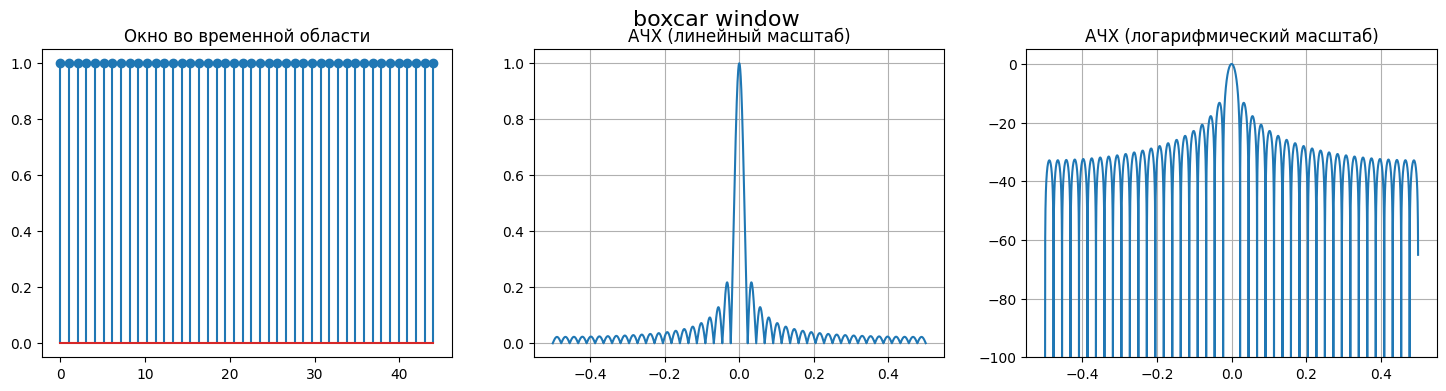

Ширина главного лепестка Δν = 0.02025
Максимальный уровень бокового лепестка = -3.04 дБ
Асимптотическая скорость спада = -8.57 дБ/октава


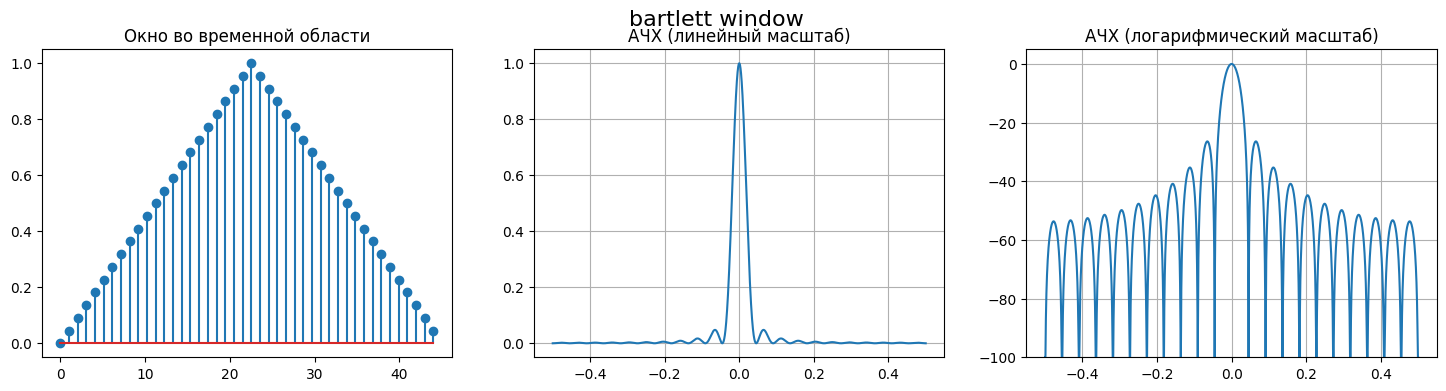

Ширина главного лепестка Δν = 0.02912
Максимальный уровень бокового лепестка = -3.03 дБ
Асимптотическая скорость спада = -11.08 дБ/октава


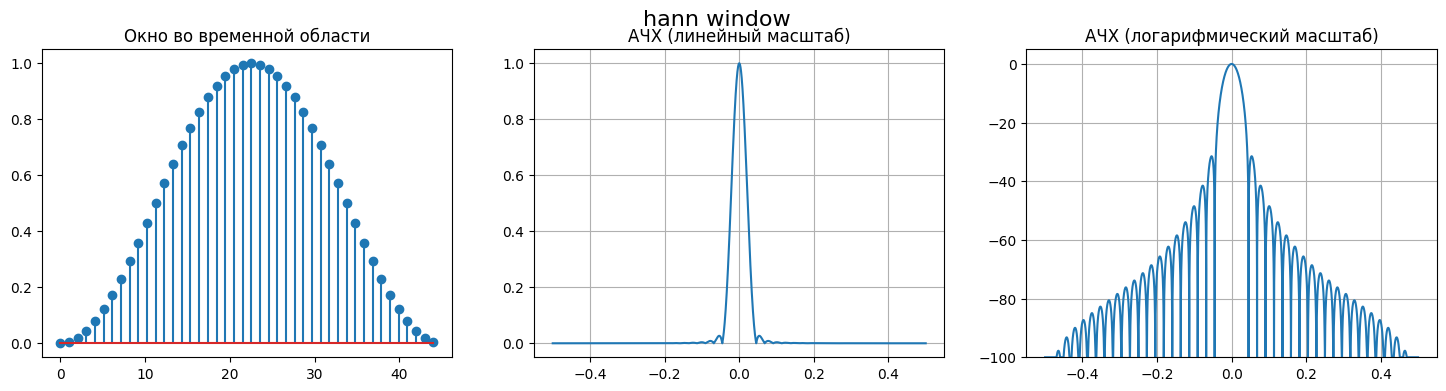

Ширина главного лепестка Δν = 0.03303
Максимальный уровень бокового лепестка = -3.06 дБ
Асимптотическая скорость спада = -19.63 дБ/октава


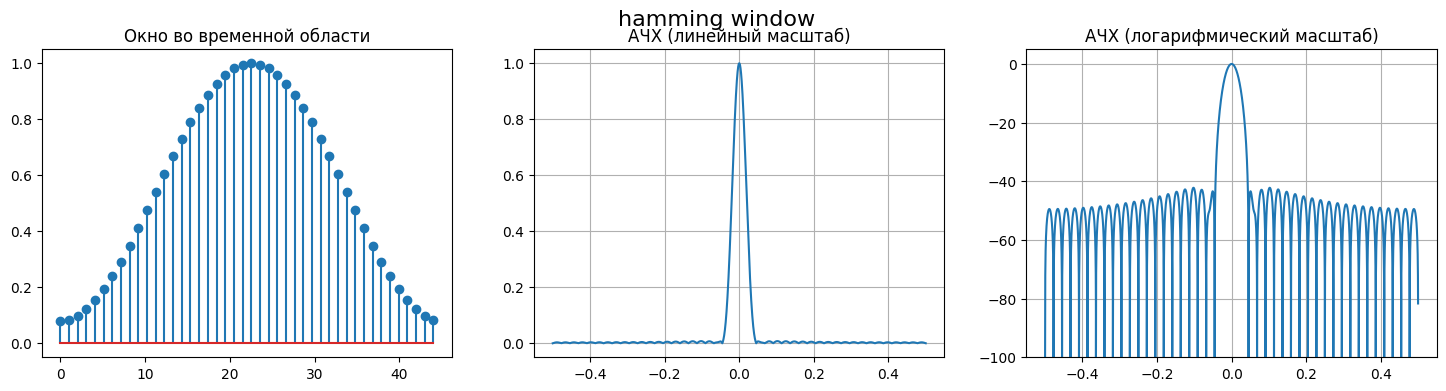

Ширина главного лепестка Δν = 0.02983
Максимальный уровень бокового лепестка = -3.06 дБ
Асимптотическая скорость спада = -12.05 дБ/октава


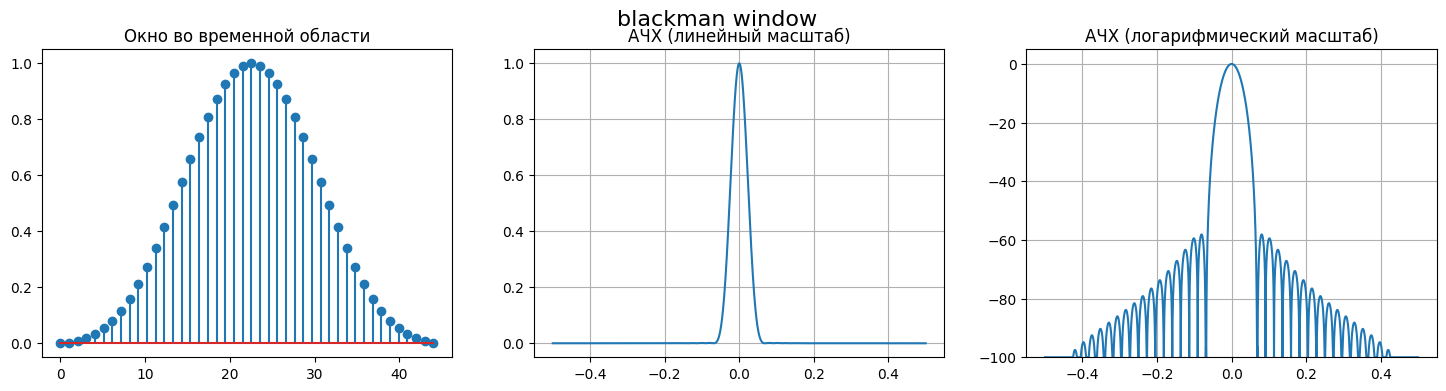

Ширина главного лепестка Δν = 0.03765
Максимальный уровень бокового лепестка = -3.06 дБ
Асимптотическая скорость спада = -38.78 дБ/октава


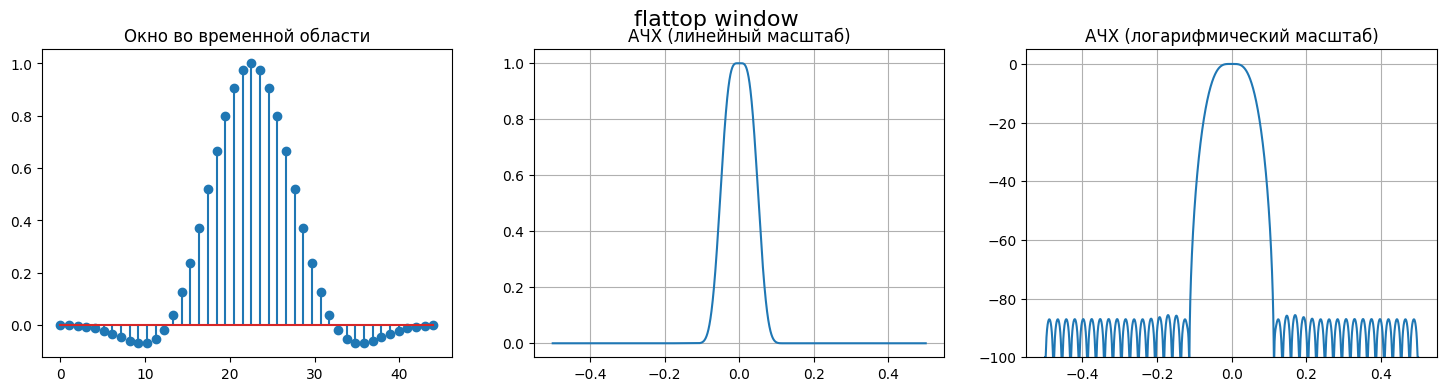

Ширина главного лепестка Δν = 0.08489
Максимальный уровень бокового лепестка = -3.04 дБ
Асимптотическая скорость спада = -89.72 дБ/октава
       Окно  Δν ширина лепестка  Макс боковой лепесток (дБ)  \
0    boxcar             0.02025                       -3.04   
1  bartlett             0.02912                       -3.03   
2      hann             0.03303                       -3.06   
3   hamming             0.02983                       -3.06   
4  blackman             0.03765                       -3.06   
5   flattop             0.08489                       -3.04   

   Скорость спада (дБ/октава)  
0                       -8.57  
1                      -11.08  
2                      -19.63  
3                      -12.05  
4                      -38.78  
5                      -89.72  


In [153]:
import pandas as pd

# Список окон, которые хотим исследовать
windows = {
    'boxcar': boxcar,
    'bartlett': bartlett,
    'hann': hann,
    'hamming': hamming,
    'blackman': blackman,
    'flattop': flattop,
}

# Параметры
Nv = 12  # номер варианта
N = 20 + 2 * Nv  # длина окна

# Список для хранения результатов
results = []

# Словарь окон
windows = {
    'boxcar': boxcar,
    'bartlett': bartlett,
    'hann': hann,
    'hamming': hamming,
    'blackman': blackman,
    'flattop': flattop,
}

# Проход по всем окнам
for name, func in windows.items():
    width, side_lobe_db, slope = drawFunc(N, func)
    results.append({
        'Окно': name,
        'Δν ширина лепестка': round(width, 5),
        'Макс боковой лепесток (дБ)': round(side_lobe_db, 2),
        'Скорость спада (дБ/октава)': round(slope, 2),
    })

# Создание таблицы
table = pd.DataFrame(results)

# Печать таблицы
print(table)



## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


In [94]:
def kaiser (N, t, b = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (np.kaiser (M, b))[t]
    else:
        return 0

C:\Users\pc\AppData\Local\Temp\ipykernel_25568\3846602888.py:21: RuntimeWarning: divide by zero encountered in log10
  spec_db = 20 * np.log10(spec_norm)


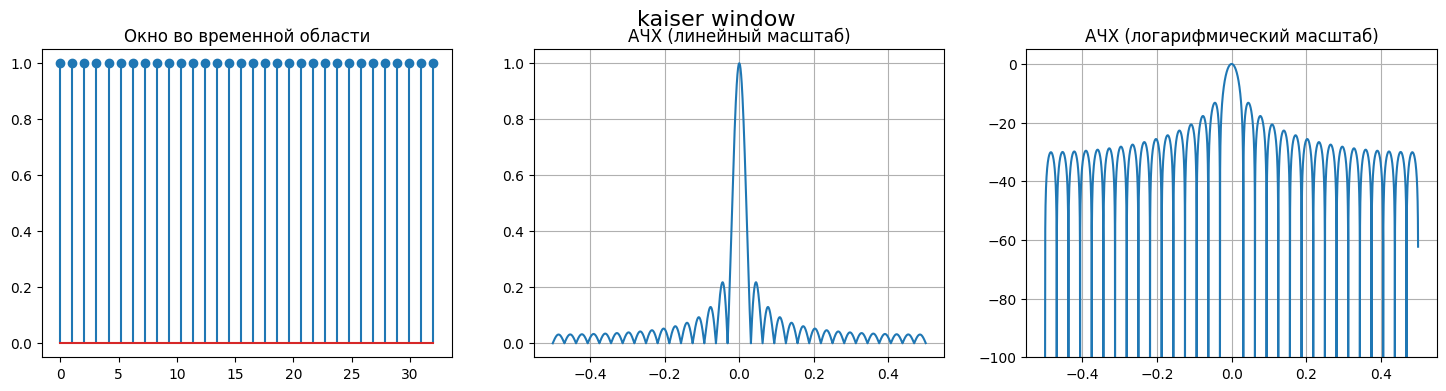

Ширина главного лепестка Δν = 0.02784
Максимальный уровень бокового лепестка = -3.04 дБ
Асимптотическая скорость спада = -8.51 дБ/октава


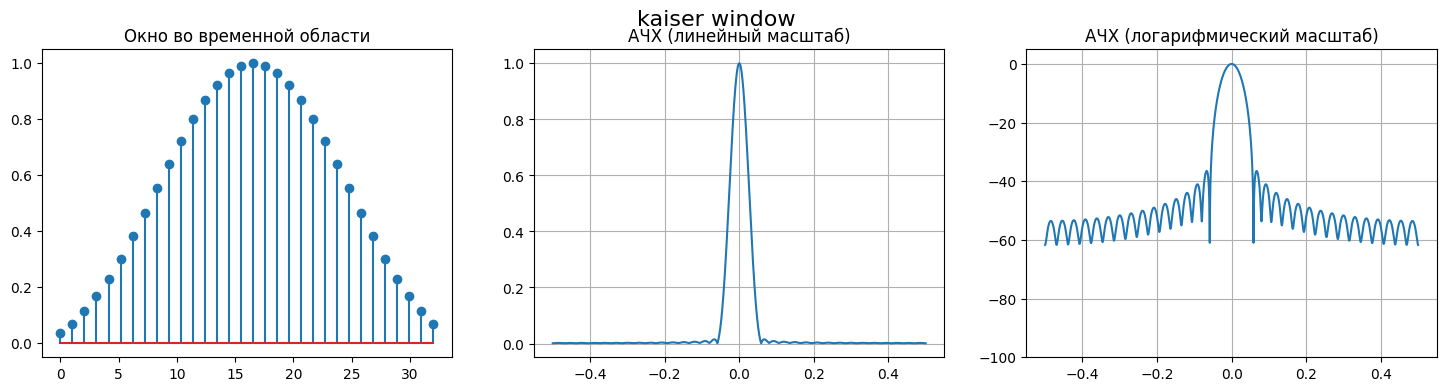

Ширина главного лепестка Δν = 0.04103
Максимальный уровень бокового лепестка = -3.05 дБ
Асимптотическая скорость спада = -13.43 дБ/октава


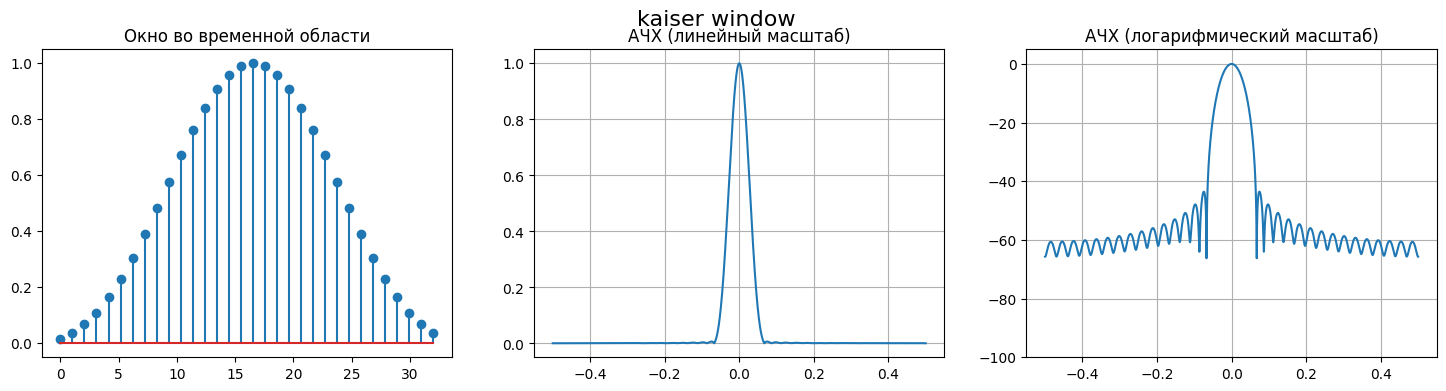

Ширина главного лепестка Δν = 0.04396
Максимальный уровень бокового лепестка = -3.03 дБ
Асимптотическая скорость спада = -21.46 дБ/октава


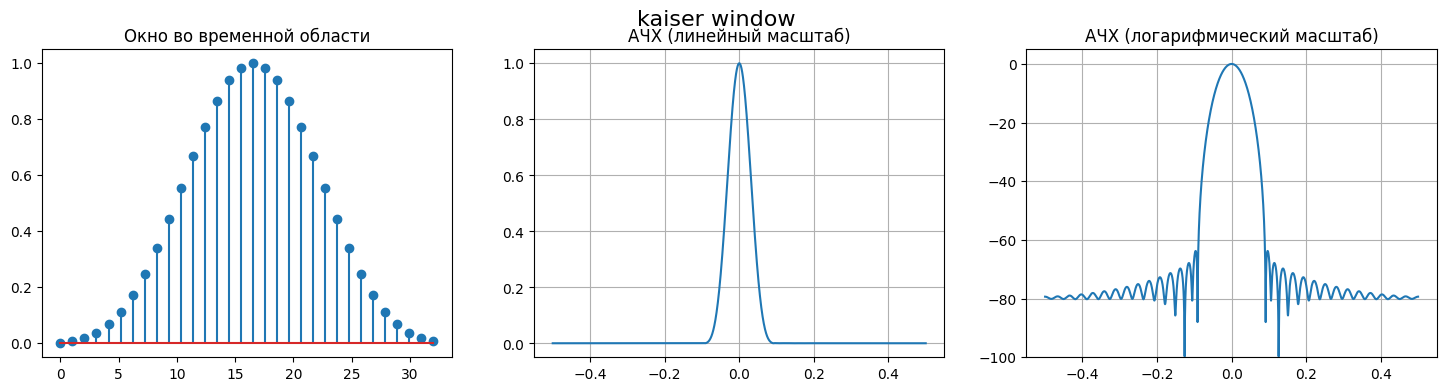

Ширина главного лепестка Δν = 0.05128
Максимальный уровень бокового лепестка = -3.02 дБ
Асимптотическая скорость спада = -48.79 дБ/октава


(np.float64(0.05128205128205132),
 np.float64(-3.0234082526751003),
 np.float64(-48.79331134996687))

In [95]:
drawFunc (32, kaiser, 0)
drawFunc (32, kaiser, 5)
drawFunc (32, kaiser, 6)
drawFunc (32, kaiser, 8.6)

## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


In [125]:
import scipy.signal.windows as win

In [126]:
def cheb (N, t, dB = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (win.chebwin (M,dB))[t]
    else:
        return 0

C:\Users\pc\AppData\Local\Temp\ipykernel_25568\3982661907.py:4: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  return a * (win.chebwin (M,dB))[t]


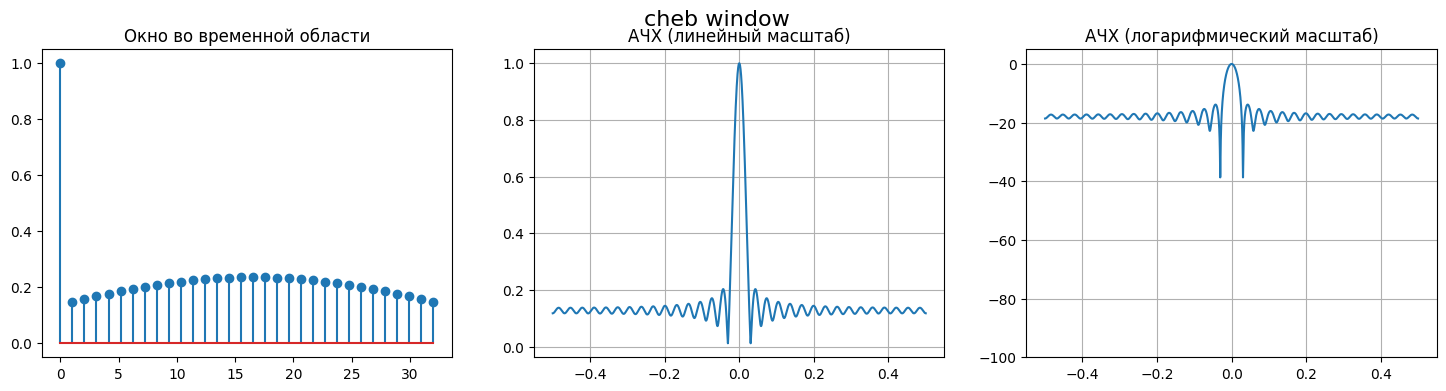

Ширина главного лепестка Δν = 0.02686
Максимальный уровень бокового лепестка = -3.00 дБ
Асимптотическая скорость спада = -1.07 дБ/октава


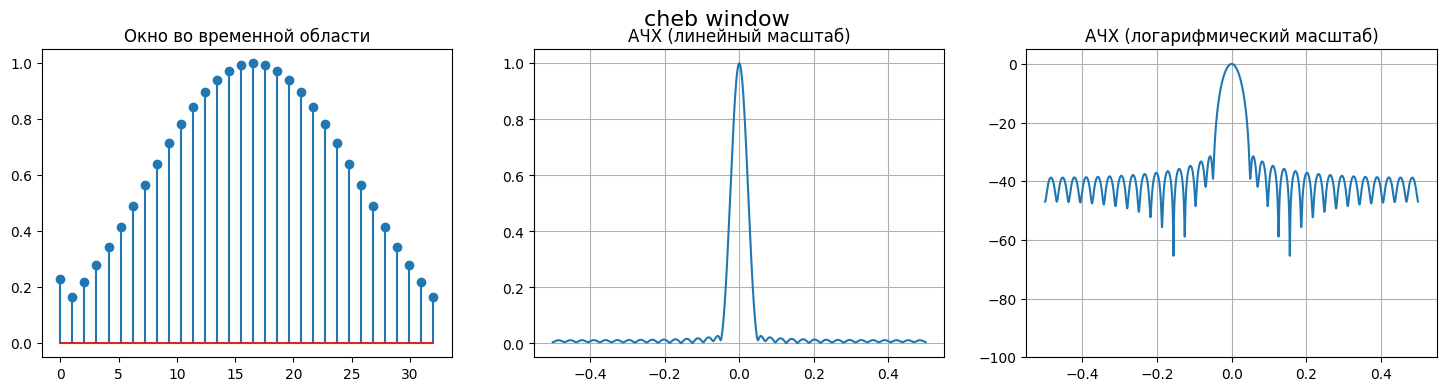

Ширина главного лепестка Δν = 0.03663
Максимальный уровень бокового лепестка = -3.05 дБ
Асимптотическая скорость спада = -6.39 дБ/октава


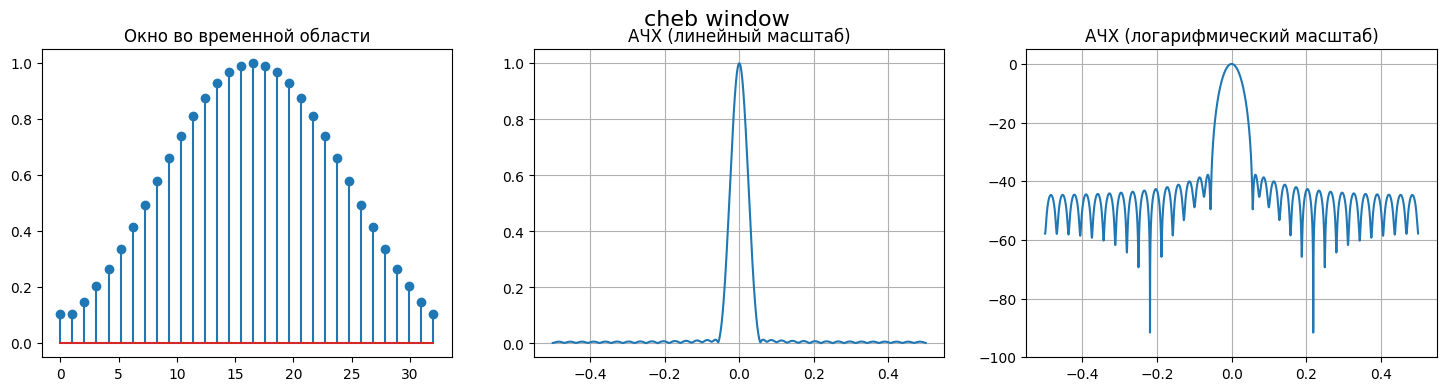

Ширина главного лепестка Δν = 0.03907
Максимальный уровень бокового лепестка = -3.02 дБ
Асимптотическая скорость спада = -9.08 дБ/октава


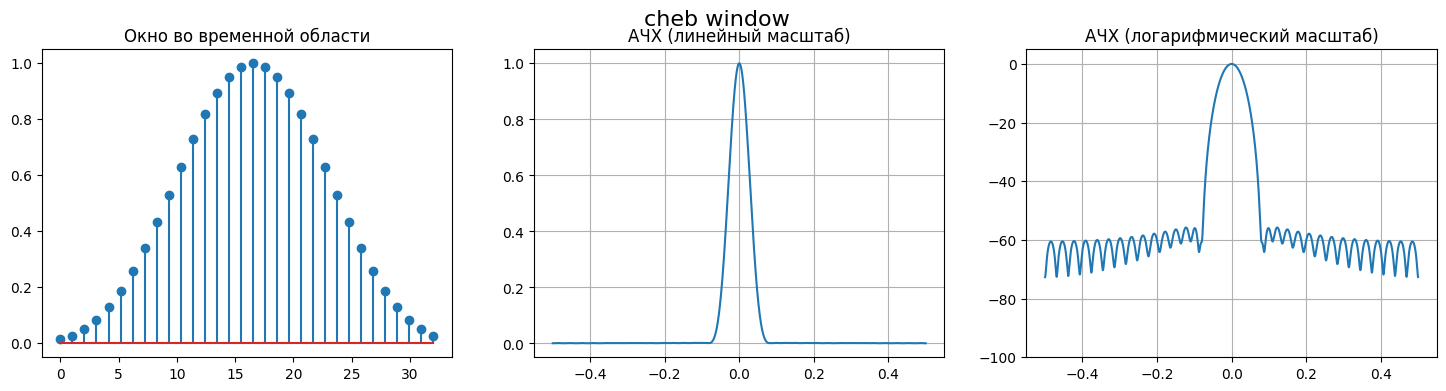

Ширина главного лепестка Δν = 0.04591
Максимальный уровень бокового лепестка = -3.02 дБ
Асимптотическая скорость спада = -27.88 дБ/октава


(np.float64(0.04590964590964591),
 np.float64(-3.019448235141324),
 np.float64(-27.88126886980801))

In [127]:
drawFunc (32, cheb, 13)
drawFunc (32, cheb, 36)
drawFunc (32, cheb, 43)
drawFunc (32, cheb, 63)

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


In [129]:
n0 = 38
b0 = 1.1
b1 = 5.5

karr = np.linspace (0, 2048, 2048, dtype=np.int32)
xarr = np.cos (2*np.pi*n0*karr/128) + np.cos (2*np.pi*(n0+2)*karr/128)


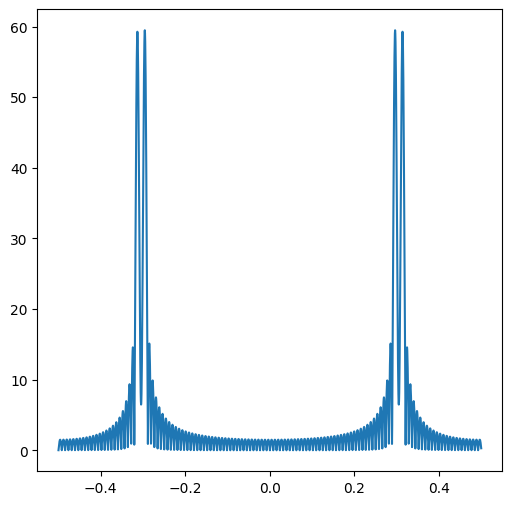

In [130]:

y1arr = np.zeros (2048)
for i in range (2048):
    y1arr[i] = xarr[i] * kaiser (128, i, b0)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y1arr)

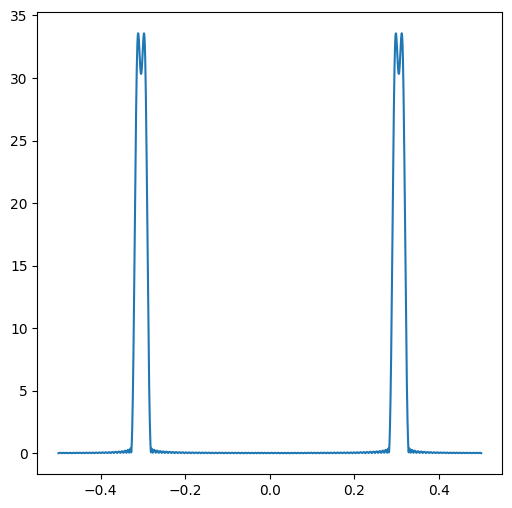

In [131]:
y2arr = np.zeros (2048)
for i in range (2048):
    y2arr[i] = xarr[i] * kaiser (128, i, b1)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y2arr)


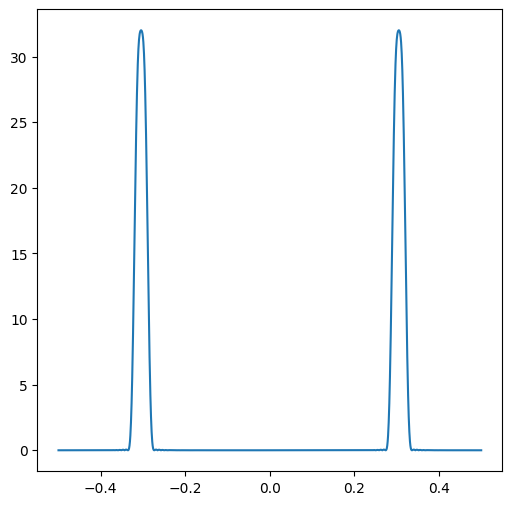

In [132]:

y3arr = np.zeros (2048)
for i in range (2048):
    y3arr[i] = xarr[i] * blackman (128, i)
y3arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y3arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y3arr)

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.**

In [137]:
m2 = -2
m3 = 4
Nv = 12
a1 = Nv + 10
a2 = a1/6
a3 = a1/2
N = 64

karr = np.linspace (0, N, N, dtype=np.int32)
xarr = a1* np.cos (2*np.pi*a1*karr/N) + a2*np.cos (2*np.pi*(a1+m2)*karr/N)  + a3*np.cos (2*np.pi*(a1+m3)*karr/N)
xarr = np.append (xarr, np.zeros (7*N))

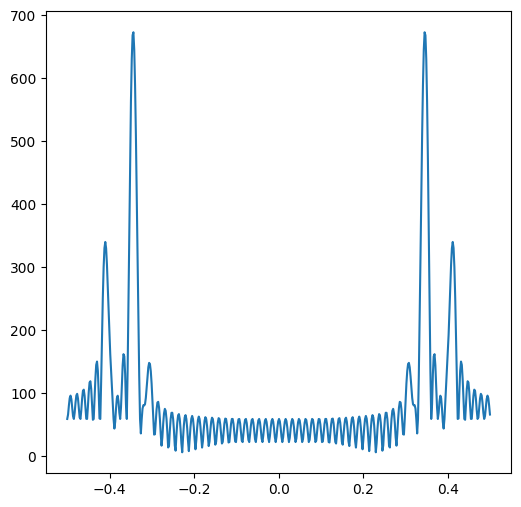

In [138]:
y1arr = np.zeros (8*N)
for i in range (8*N):
    y1arr[i] = xarr[i] * boxcar (N, i)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y1arr)

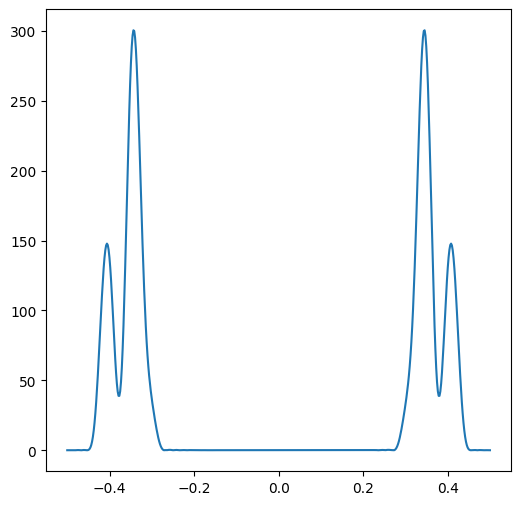

In [139]:
y2arr = np.zeros (8*N)
for i in range (8*N):
    y2arr[i] = xarr[i] * blackman (N, i)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y2arr)

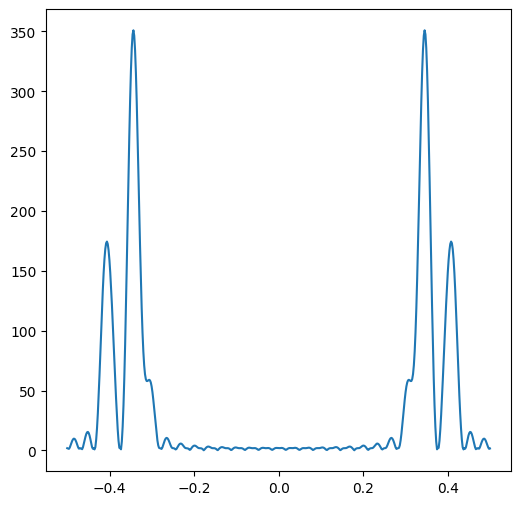

In [140]:
y3arr = np.zeros (8*N)
for i in range (8*N):
    y3arr[i] = xarr[i] * bartlett (N, i)
y3arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y3arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y3arr)

Кайзер окна:


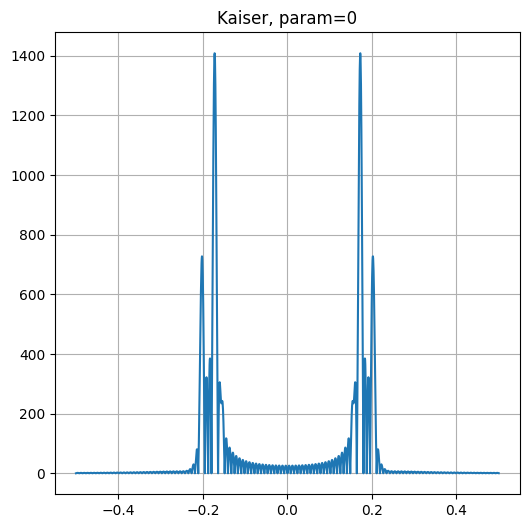

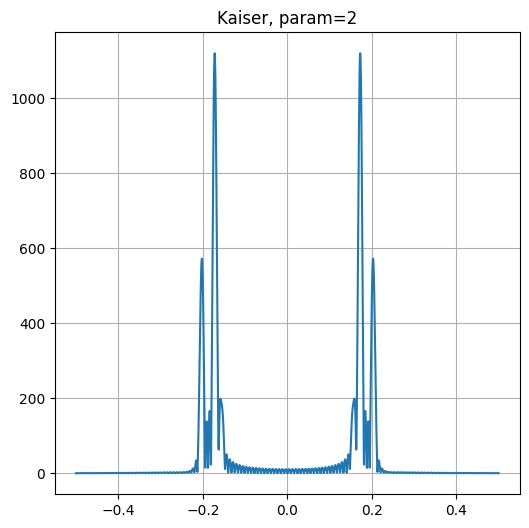

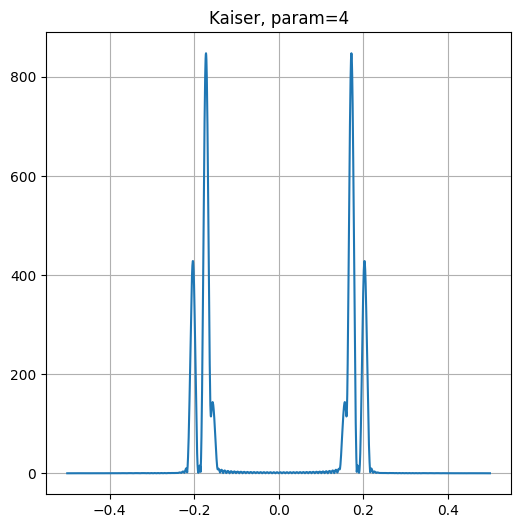

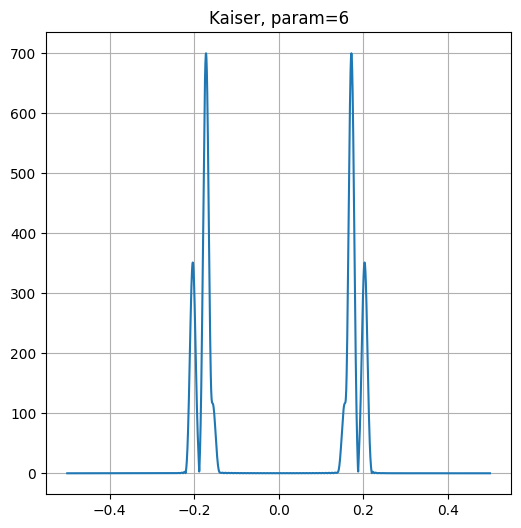

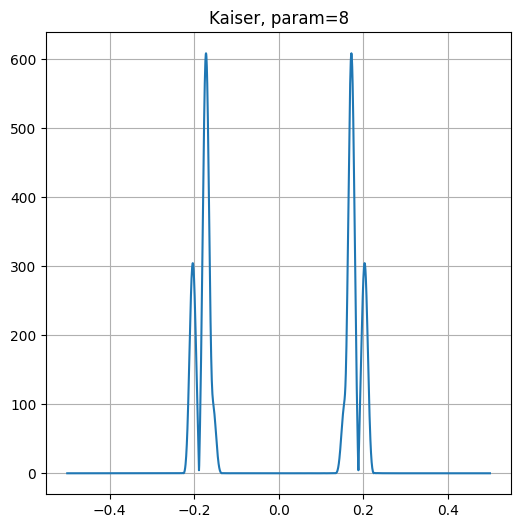

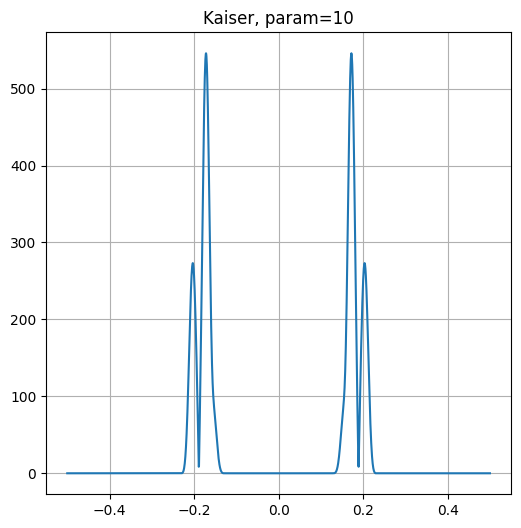

Чебышевские окна:


C:\Users\pc\AppData\Local\Temp\ipykernel_25568\647914880.py:46: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  window = win.chebwin(N, at=attenuation)


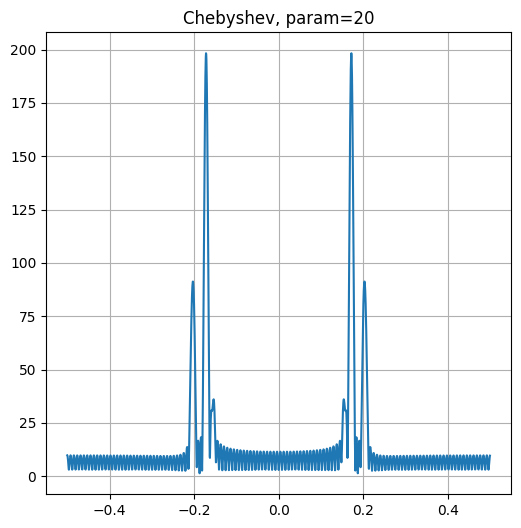

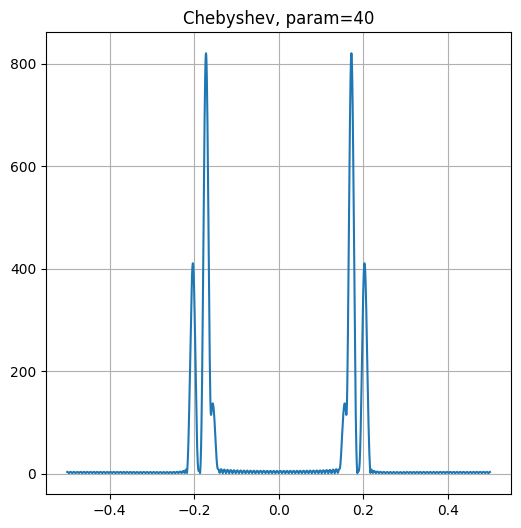

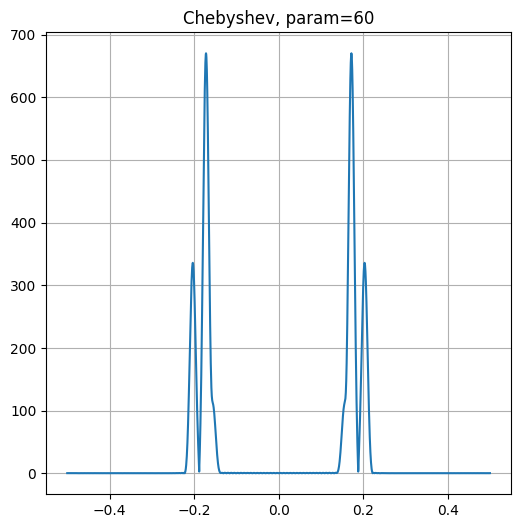

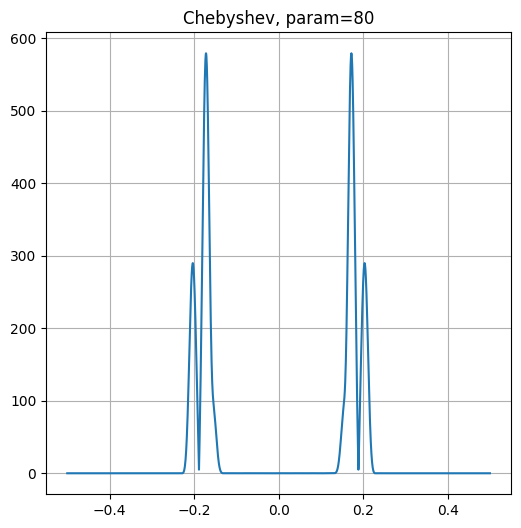

In [158]:
import numpy as np
import scipy.signal.windows as win
import scipy.fft as fft
import matplotlib.pyplot as plt

# Генерация твоего сигнала
N = 128
k = np.arange(N)
n_v = 12  # номер варианта
n = n_v + 10
m2 = -2   # твои значения из таблицы
m3 = 4
a1 = n
a2 = a1 / 6
a3 = a1 / 2

xarr = (a1 * np.sin(2 * np.pi * n * k / N) +
        a2 * np.cos(2 * np.pi * (n + m2) * k / N) -
        a3 * np.sin(2 * np.pi * (n + m3) * k / N))

# Параметры БПФ
M = 2048  # размер ДПФ

# --- Функция построения спектра ---
def plot_spectrum(signal, window, window_name, param_value):
    yarr = np.zeros(M)
    for i in range(N):
        yarr[i] = signal[i] * window[i]
    spectrum = np.abs(fft.fftshift(fft.fft(yarr)))
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(np.linspace(-0.5, 0.5, M), spectrum)
    ax.set_title(f"{window_name}, param={param_value}")
    ax.grid(True)
    plt.show()

# --- Перебор Кайзер окон ---
print("Кайзер окна:")
for beta in [0, 2, 4, 6, 8, 10]:
    window = win.kaiser(N, beta)
    plot_spectrum(xarr, window, "Kaiser", beta)

# --- Перебор Чебышев окон ---
print("Чебышевские окна:")
for attenuation in [20, 40, 60, 80]:
    window = win.chebwin(N, at=attenuation)
    plot_spectrum(xarr, window, "Chebyshev", attenuation)


## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

In [145]:
N = 128
n0 = 38.5

karr = np.linspace (0, N, N, dtype=np.int32)
xarr = np.cos (2*np.pi*n0*karr/N)


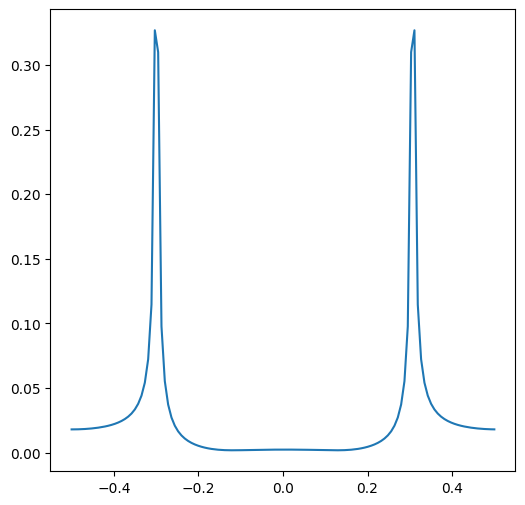

In [146]:
y1arr = np.zeros (N)
s = 0
for i in range (N):
    y1arr[i] = xarr[i] * boxcar (N, i)
    s += boxcar (N, i)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, N), y1arr)

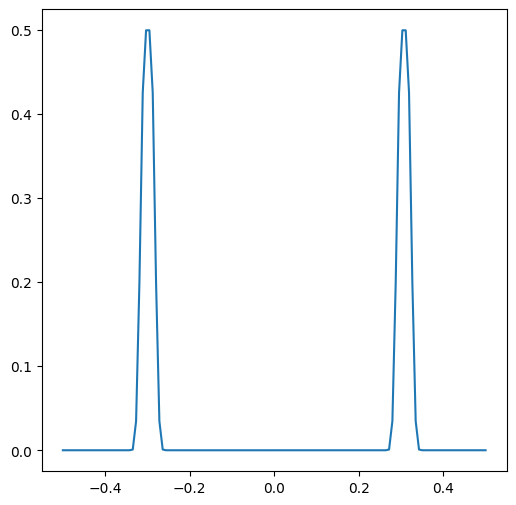

In [147]:
y2arr = np.zeros (N)
s = 0
for i in range (N):
    y2arr[i] = xarr[i] * flattop (N, i)
    s += flattop (N, i)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, N), y2arr)

Вывод     
Прямоугольное	Узкий пик, но неправильная амплитуда (амплитуда занижена).      
Flattop      	Широкий пик, но правильная амплитуда гармоники сохраняется.     

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


windows size (seconds): 0.17066666666666666
time resolution (seconds): 0.128
frequency resolution (Hz): 2.9296875


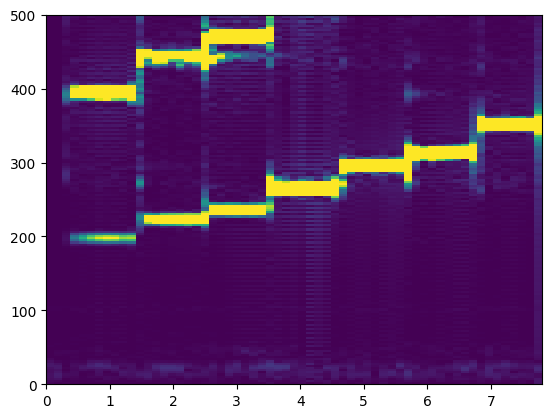

In [160]:
samplerate, data = sp.io.wavfile.read ('./dataset_lab3_/violin_natural_minor_up.wav')

M = 8192
R = 6144
window = hamming
N = 16384

data = data[0:data.shape[0]//R * R]

print ('windows size (seconds):', M/samplerate)
print ('time resolution (seconds):', R/samplerate)
print ('frequency resolution (Hz):', samplerate/N) # расстояние между частотами ДПФ

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 500)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

windows size (seconds): 0.08533333333333333
time resolution (seconds): 0.128
frequency resolution (Hz): 5.859375


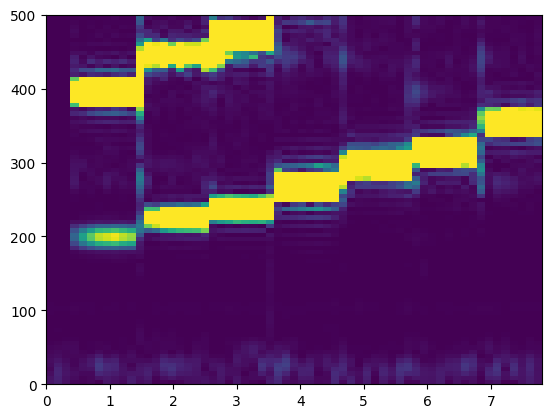

In [163]:
samplerate, data = sp.io.wavfile.read ('./dataset_lab3_/violin_natural_minor_up.wav')

M = 4096
R = 6144
window = hann
N = 8192

data = data[0:data.shape[0]//R * R]

print ('windows size (seconds):', M/samplerate)
print ('time resolution (seconds):', R/samplerate)
print ('frequency resolution (Hz):', samplerate/N) # расстояние между частотами ДПФ

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 500)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

In [149]:
from IPython.display import Audio
file = './dataset_lab3_/violin_natural_minor_up.wav'
Audio(file)


Влияние длины окна M:     

Если уменьшаем M	      
Разрешение по времени улучшается — видно быстрые изменения сигнала.	    
Спектры становятся "размазанными" по частоте.	     
Пики в частотной области широкие, трудно различать близкие частоты.	    

Если увеличиваем M            
Разрешение по частоте улучшается — пики становятся узкими.        
Спектры становятся "размазанными" по времени.      
Пики в частотной области узкие, близкие гармоники хорошо различимы.      

Влияние размерности БПФ N:      

Если уменьшаем N      	
Спектрограмма получается "грубой", мало точек по частоте.	   
Линии "ступенчатые", некрасивая картинка.	   
Реальное разрешение по частоте не меняется! (просто меньше интерполяции)	

 
Если увеличиваем N     
Спектрограмма получается "гладкой", много точек по частоте.         
 Линии плавные и ровные, эстетичная картинка.      
 Реальное разрешение по частоте не меняется, но визуально лучше.

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

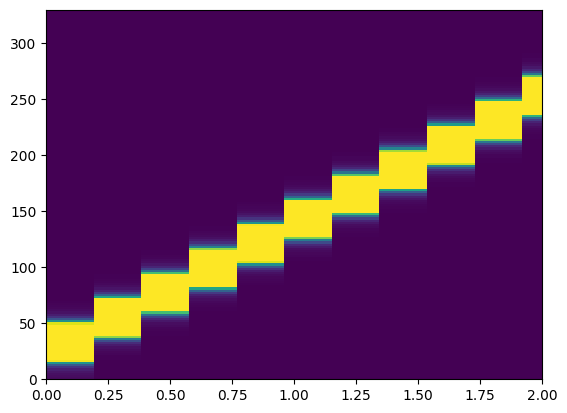

In [231]:
window = blackman
nperseg = 512
nfft = 1024

samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

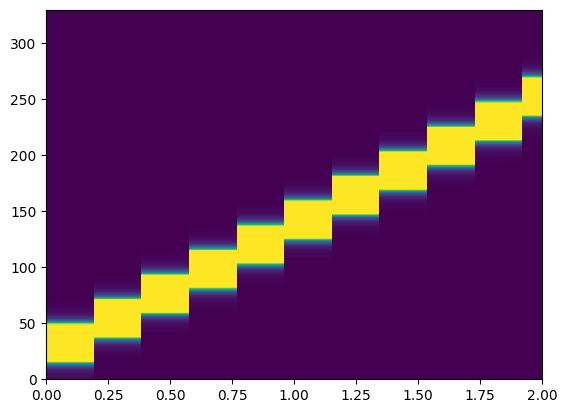

In [232]:
window = blackman
nperseg = 512
nfft = 1024*4

samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

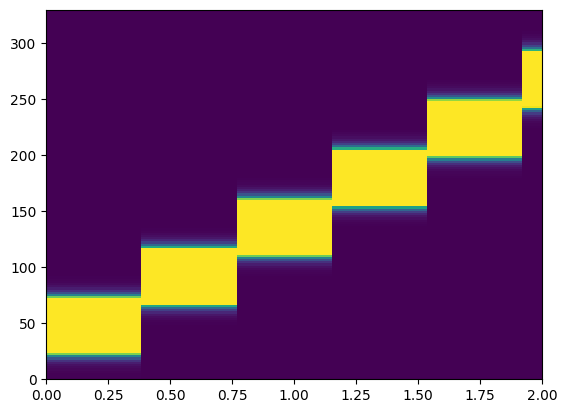

In [222]:
window = blackman
nperseg = 512*2
nfft = 1024
samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

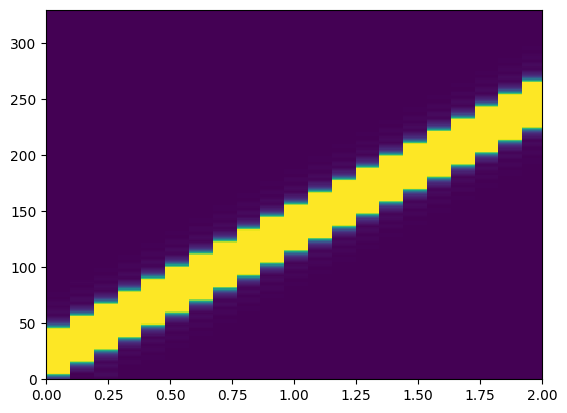

In [ ]:
window = blackman
nperseg = 256
nfft = 1024*2
samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)
ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

задачи 
1 1 2 5 3 1
